In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D , MaxPooling1D , Flatten , Dense
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [98]:
df_train = pd.read_csv('/content/mitbih_train.csv' , header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
print(df_train.columns)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)


In [100]:
df_train.shape

(87554, 188)

In [101]:
df_train.isna().sum().any()

False

In [102]:
df_train.duplicated().sum()

0

In [103]:
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
#label = ["Normal","Supraventricular","Ventricular","Fusion","Unknown"]
df_train[187].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


In [108]:
df_normal = df_train[df_train[187]==0]
df_Supraventricular = df_train[df_train[187]==1]
df_Ventricular = df_train[df_train[187]==2]
df_Fusion = df_train[df_train[187]==3]
df_Unknown = df_train[df_train[187]==4]


dataframes = [df_normal, df_Supraventricular, df_Ventricular, df_Fusion, df_Unknown]
labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']
colors = ['b', 'magenta', 'r', 'g', 'Orange']

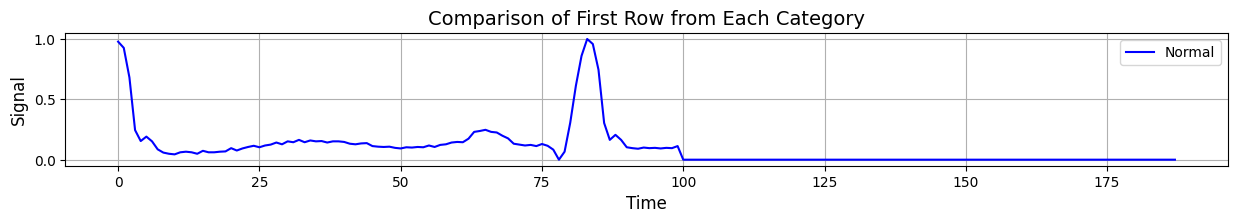

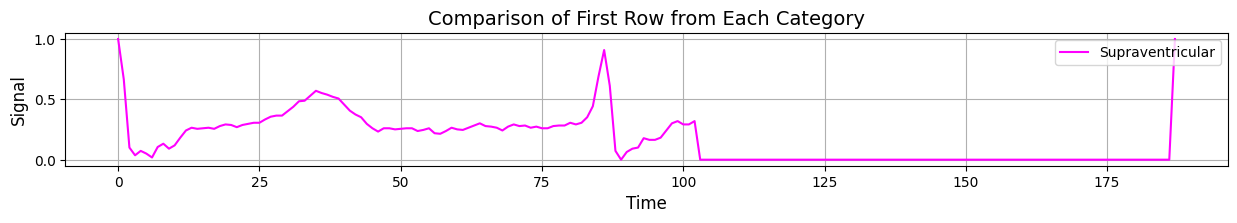

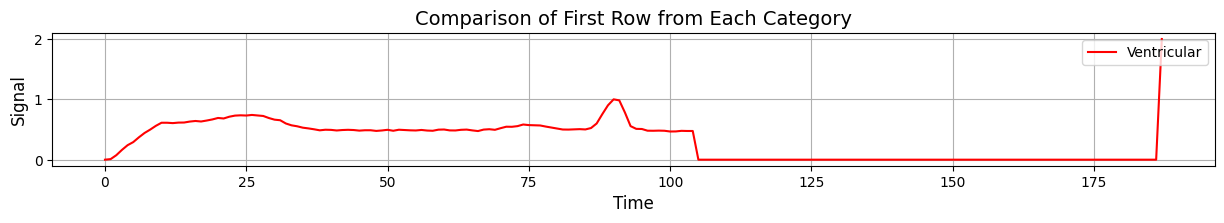

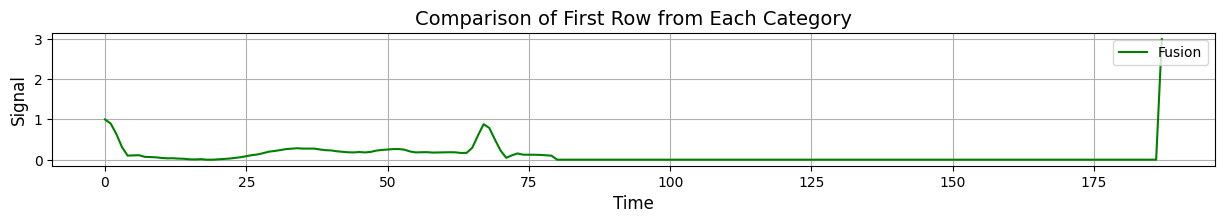

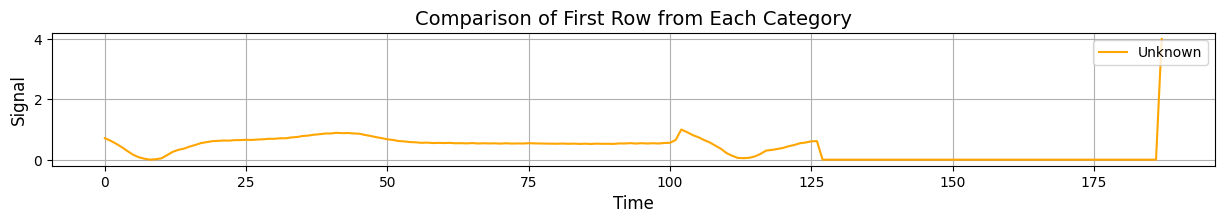

In [109]:
for i in range(5):
  plt.figure(figsize=(15,10))
  plt.subplot(5,1,i+1)
  plt.plot(dataframes[i].iloc[0] , label=labels[i] , color=colors[i])

  plt.title('Comparison of First Row from Each Category', fontsize=14)
  plt.xlabel('Time', fontsize=12)
  plt.ylabel('Signal', fontsize=12)
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.show()


In [110]:
X = df_train.drop(columns=187)
y = df_train[187]

In [111]:
X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train , X_test , y_train ,y_test = train_test_split(X,y , random_state=42)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [115]:
smote=SMOTE()
X_resample , y_resample = smote.fit_resample(X,y)
X_train , X_test , y_train , y_test = train_test_split(X_resample , y_resample , random_state=True)

In [116]:
y.value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


In [117]:
y_resample.value_counts()

,count
187,
0.0,72471
1.0,72471
2.0,72471
3.0,72471
4.0,72471


In [118]:
model = RandomForestClassifier(class_weight='balanced')

In [119]:
model.fit(X_train ,y_train)

RandomForestClassifier(class_weight='balanced')

In [120]:
model.score(X_test ,y_test)

0.9965337954939342

In [121]:
y_pred = model.predict(X_test)

In [122]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18155
         1.0       1.00      1.00      1.00     18175
         2.0       1.00      1.00      1.00     18196
         3.0       1.00      1.00      1.00     18111
         4.0       1.00      1.00      1.00     17952

    accuracy                           1.00     90589
   macro avg       1.00      1.00      1.00     90589
weighted avg       1.00      1.00      1.00     90589



##Apply CNN

In [123]:
X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

In [124]:
X_train_arr.shape

(271766, 187)

In [126]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [127]:
y_train.shape

(271766,)

In [128]:
X_train.shape

(271766, 187, 1)

In [129]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(187, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 103s 12ms/step - accuracy: 0.7985 - loss: 0.5464
Epoch 2/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.9108 - loss: 0.2541
Epoch 3/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - accuracy: 0.9284 - loss: 0.2053
Epoch 4/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accuracy: 0.9394 - loss: 0.1764
Epoch 5/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 77s 9ms/step - accuracy: 0.9463 - loss: 0.1581
Epoch 6/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - accuracy: 0.9512 - loss: 0.1422
Epoch 7/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.9554 - loss: 0.1317
Epoch 8/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.9577 - loss: 0.1236
Epoch 9/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - accuracy: 0.9618 - loss: 0.1133
Epoch 10/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - accuracy: 0.9630 - loss: 0.1091
Epoch 11/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 79s 9ms/step - accuracy: 0.9641 - loss: 0.1054
Epoch 12/50
8493/

In [143]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 185, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 5888)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 5)                   │          29,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,105 (348.07 KB)

 Trainable params: 29,701 (116.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,404 (232.05 KB)

In [144]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2831/2831 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9832 - loss: 0.0564
Test Loss: 0.055222075432538986
Test Accuracy: 0.9830995202064514


In [145]:
y_prd = model.predict(X_test)

2831/2831 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step


In [148]:
y_pred_labels = np.argmax(y_prd, axis=1)  # For multi-class classification

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     18197
         1.0       0.97      0.98      0.98     18155
         2.0       0.99      0.99      0.99     18192
         3.0       0.98      1.00      0.99     18079
         4.0       1.00      0.99      1.00     17966

    accuracy                           0.98     90589
   macro avg       0.98      0.98      0.98     90589
weighted avg       0.98      0.98      0.98     90589

